In [1]:

import pandas as pd
import numpy as np
import re
df = pd.read_excel('data.xlsx',index_col=0)
SIZES = [100,500,1000]
ITERATIONS = [1000, 10000, 100000]
times=[]
stds =[]
df

,1000,5000,10000,25000,50000
100,123 ms ± 3.66 ms,625 ms ± 10.4 ms,1.24 s ± 64.6 ms,3.01 s ± 78 ms,6.99 s ± 882 ms
250,577 ms ± 39.2 ms,2.91 s ± 82.7 ms,6.39 s ± 365 ms,16.1 s ± 1.09 s,31.6 s ± 1.06 s
500,2.25 s ± 166 ms,12.3 s ± 465 ms,24.2 s ± 727 ms,1 min 3 s ± 4.46 s,1 min 57 s ± 7.38 s
1000,8.26 s ± 361 ms,41.4 s ± 621 ms,1 min 29 s ± 1.75 s,3 min 47 s ± 11.4 s,7 min 27 s ± 30.8 s
2000,42.2 s ± 1.6 s,3 min 30 s ± 5.38 s,6 min 58 s ± 22.8 s,16 min 36 s ± 1 min 20s,35 min 18 s ± 3 min 19 s


In [2]:
def convert(value,unit='ms'):
    if unit=='s':
        unit=1/1000
    else:
        unit = 1
    u = {'s':1000,'min':60000}
    time = value.split(" ± ")[0]
    if ' min' in time:
        patt = r'(\d+) \w+ (\d+) \w+'
        data = re.match(patt,time)
        return (float(data.group(1))*u['min']+float(data.group(2))*u['s'])*unit
    if ' s' in time:
        return (float(time.split(' ')[0])*u['s'])*unit
    return (float(time.split(' ')[0]))*unit
            

In [3]:
for size in SIZES:
    for iteration in ITERATIONS:
        df.loc[size,iteration]=convert(df.loc[size,iteration])
df


,1000,5000,10000,25000,50000
100,123.0,625.0,1240.0,3010.0,6990.0
250,577.0,2910.0,6390.0,16100.0,31600.0
500,2250.0,12300.0,24200.0,63000.0,117000.0
1000,8260.0,41400.0,89000.0,227000.0,447000.0
2000,42200.0,210000.0,418000.0,996000.0,2118000.0


Text(0, 0.5, 'Time in miliseconds')

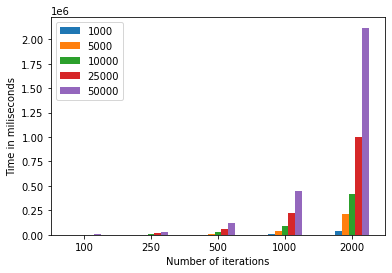

In [4]:
import matplotlib.pyplot as plt
min_value = df.min().min()
max_value = int(df.max().max())

ax= df.plot.bar(rot=0 )
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Time in ' + ("miliseconds" if min_value>1 else 'seconds') )
